# This program is developed by Soheil Hekmat for Measurement Project

in this program we wanna use our dataset which was built in our tests by IMU sensors for KNN method

# importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import chdir
from sklearn import preprocessing
chdir('C:\\Users\\Predator\\Downloads')

# Creating Dataframe by Pandas

In [4]:
df = pd.read_csv('All.txt')
df.head(10)

,AccelX,AccelY,AccelZ,L
0,0.00,-0.00,1.0,0
1,-0.00,-0.01,1.0,0
2,0.00,0.01,1.0,0
3,0.01,0.00,1.0,0
4,0.00,-0.01,1.0,0
5,-0.00,0.00,1.0,0
6,-0.00,-0.00,1.0,0
7,0.01,0.01,1.0,0
8,-0.00,-0.01,1.0,0
9,-0.01,0.00,1.0,0


here we check how many different labels we have in this dataframe.

In [5]:
df['L'].value_counts()

L
0    100
1     50
2     50
Name: count, dtype: int64

in this section we get a statistical summery of our dataframe

In [6]:
df.describe()

,AccelX,AccelY,AccelZ,L
count,200.000000,200.000000,200.000000,200.000000
mean,0.008450,-0.012700,0.995700,0.750000
std,0.046496,0.064728,0.112917,0.831237
min,-0.160000,-0.330000,0.530000,0.000000
25%,0.000000,-0.012500,0.990000,0.000000
50%,0.000000,0.000000,1.000000,0.500000
75%,0.010000,0.000000,1.010000,1.250000
max,0.330000,0.240000,1.470000,2.000000


so we have 200 datas with 3 features. our datas are labled so we should do a supervised machine learning method. 

our fetures are acceleration values in x-y-z axis and label is 0,1 and 2. each number  refers to a state of action and movement. 0 for static state, 1 for walking and 2 for running.

# creating X and Y arrays

we assign 3 features(all we got) to X and our Label to Y

In [8]:
X = df[['AccelX','AccelY','AccelZ']] .values 
Y = df['L'].values
X[0:5]

array([[ 0.  , -0.  ,  1.  ],
       [-0.  , -0.01,  1.  ],
       [ 0.  ,  0.01,  1.  ],
       [ 0.01,  0.  ,  1.  ],
       [ 0.  , -0.01,  1.  ]])

# Data Preprocessing and Normalization

here we normalize our data to get zero mean and normal standard deviation based on gausian destribution to get better results from model.

In [9]:
scalar = preprocessing.StandardScaler().fit(X)
X = scalar.transform(X.astype(float))
X

array([[-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.04181797,  0.03817661],
       [-0.18219089,  0.35158069,  0.03817661],
       [ 0.03341963,  0.19669933,  0.03817661],
       [-0.18219089,  0.04181797,  0.03817661],
       [-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.19669933,  0.03817661],
       [ 0.03341963,  0.35158069,  0.03817661],
       [-0.18219089,  0.04181797,  0.03817661],
       [-0.39780141,  0.19669933,  0.03817661],
       [-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.04181797,  0.03817661],
       [-0.18219089,  0.35158069,  0.03817661],
       [ 0.03341963,  0.19669933,  0.12695943],
       [-0.39780141,  0.19669933,  0.03817661],
       [-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.19669933, -0.05060621],
       [-0.18219089,  0.19669933,  0.03817661],
       [-0.18219089,  0.04181797,  0.12695943],
       [-0.18219089,  0.19669933, -0.050

# splitting datas into train and test

 we use 80% of data for training the model and the rest(20%) for testing it

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 3) (160,)
Test set: (40, 3) (40,)


# KNN Classification

we use KNN method for classification.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
k = 3
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
# prediction
Yhat = neigh.predict(X_test)
Yhat

array([0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0], dtype=int64)

checking the accuracy of the model

In [14]:
# checking the accuracy
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Yhat))

Train set Accuracy:  0.825
Test set Accuracy:  0.825


so our model is 82.5% accurate in both of them.

# classifying a new data

In [26]:
new_data = [0.11,0.02,1.06]
new = np.array(new_data).reshape(1, -1)
new_label = neigh.predict(new)
new_label

array([1], dtype=int64)

so this data is for walking state.(because label 1 is walking)

# Confusion matrix

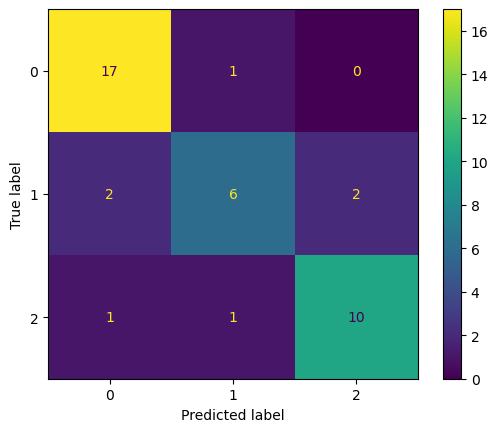

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
# confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Yhat)

# checking model's recall and precision

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Yhat))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.75      0.60      0.67        10
           2       0.83      0.83      0.83        12

    accuracy                           0.82        40
   macro avg       0.81      0.79      0.80        40
weighted avg       0.82      0.82      0.82        40



# using another method for classification: SVM

In [18]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 
yhat2 = clf.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat2))

Train set Accuracy:  0.7625
Test set Accuracy:  0.75


so we got 75% accuaracy which is lower than KNN.